In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import math

from statsmodels.stats.weightstats import ztest as ztest

plt.style.use('ggplot')    # стиль графиков

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline

In [3]:
#for X1

sample1 = stats.norm(loc=10, scale=2).rvs(200) 

mean1 = np.mean(sample1)
s1 = np.var(sample1)
std1 = np.std(sample1)
n1 = 200

print("X1: mean1 = %.3f; s1 = %.3f; std1 = %.3f; n1 = %.3f" % (mean1, s1, std1, n1))

X1: mean1 = 9.970; s1 = 3.769; std1 = 1.941; n1 = 200.000


In [5]:
#for X1
m0 = 9.8
ttest_1 = stats.ttest_1samp(sample1, m0) #t-test 1 sample

print(ttest_1)

m0 = 10.2 #z-test 1 sample
sd = 2
z = (mean1 - m0) * n1**(1/2) / sd
f_z = stats.norm(loc=0, scale=1).cdf(z)
p_value = 2 * min(f_z, 1 - f_z)

print("Z-test 1_smple: z = %.3f; p-value = %.3f" % (z, p_value))

#chi-squared test, m is known
std_0 = 2.1

m = 10   # найдем дисперсию при известном m
sum = 0
for x in sample1:
  sum += (x - m)**2
s_0 = sum / n1



z = (n1 * s_0) / (std_0 ** 2)
f_z_chi =  stats.chi2(n1).cdf(z)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("chi-squared test (m is known): z = %.3f; p-value = %.3f" % (z, p_value))

#chi-squared test, m is not known
std_0 = 2

z = ((n1 - 1) * s1) / (std_0 ** 2)
f_z_chi =  stats.chi2.cdf(z, n1 - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("chi-squared test (m is not known): z = %.3f; p-value = %.3f" % (z, p_value))


Ttest_1sampResult(statistic=1.2340574357838565, pvalue=0.21863690292996887)
Z-test 1_smple: z = -1.628; p-value = 0.104
chi-squared test (m is known): z = 170.954; p-value = 0.135
chi-squared test (m is not known): z = 187.490; p-value = 0.579


0.28948351778153847

In [ ]:
#for X2

sample2 = stats.norm(loc=5, scale=2).rvs(200)  

mean2 = np.mean(sample2)
s2 = np.var(sample2)
std2 = np.std(sample2)
n2 = 200

print("X2: mean2 = %.3f; s2 = %.3f; std2 = %.3f; n2 = %.3f" % (mean2, s2, std2, n2))

X2: mean2 = 5.173; s2 = 4.522; std2 = 2.126; n2 = 200.000


In [ ]:
#Pooled for X1 and X2

mean_pol = (n1 * mean1 + n2 * mean2)/(n1 + n2) 
d_pol = ((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)
std_pol = d_pol**1/2
n_pol = n1 + n2
print("Pooled for X1 and X2: mean_pol = %.3f; d_pol = %.3f; std_pol = %.3f; n_pol = %.3f" % (mean_pol, d_pol, std_pol, n_pol))

Pooled for X1 and X2: mean_pol = 7.576; d_pol = 4.579; std_pol = 2.289; n_pol = 400.000


In [ ]:
#for X1 X2

ttest_2_sample = stats.ttest_ind(sample1, sample2) #two-sample unpooled t-test
print(ttest_2_sample)

#two-sample f-test (m изв)
m1 = 10
m2 = 5

d_01 = s_0

sum = 0
for x in sample2:
  sum += (x - m2)**2
d_02 = sum / n2


z = d_01 / d_02
f_z_f =  stats.f(n1, n2).cdf(z)
p_value = 2 * min(f_z_f, 1 - f_z_f)
print("two-sample f-test (m is known): z = %.3f; p-value = %.3f" % (z, p_value))

#two-sample f-test (m неизв)

z = s1 / s2
f_z_f =  stats.f(n1-1, n2-1).cdf(z)
p_value = 2 * min(f_z_f, 1 - f_z_f)
print("two-sample f-test (m is not known): z = %.3f; p-value = %.3f" % (z, p_value))

Ttest_indResult(statistic=22.405079572905127, pvalue=1.6266888162113697e-72)
two-sample f-test (m is known): z = 1.019; p-value = 0.897
two-sample f-test (m is not known): z = 1.025; p-value = 0.861


In [ ]:
#П4

m0 = 10 #z-test 1 sample
sd = 2
z = (mean1 - m0) * n1**(1/2) / sd
f_z = stats.norm(loc=0, scale=1).cdf(z)
p_value = 2 * min(f_z, 1 - f_z)

n = 1000
arr = list()
z = list()
p = list()
for i in range(n):
  arr.append(stats.norm(loc=10, scale=2).rvs(n1))
  z.append((arr[i].mean() - m0) * n1**(1/2) / sd)
  f_z = stats.norm(loc=0, scale=1).cdf(z[i])
  p.append(2 * min(f_z, 1 - f_z))

mean_z = np.mean(z)
d_z = np.var(z)
std_z = np.std(z)

mean_p = np.mean(p)
d_p = np.var(p)
std_p = np.std(p)

print("mean_z = %.3f; d_z = %.3f; std_z = %.3f" % (mean_z, d_z, std_z))
print("mean_p = %.3f; d_p = %.3f; std_p = %.3f" % (mean_p, d_p, std_p))


mean_z = -0.033; d_z = 1.036; std_z = 1.018
mean_p = 0.495; d_p = 0.085; std_p = 0.291


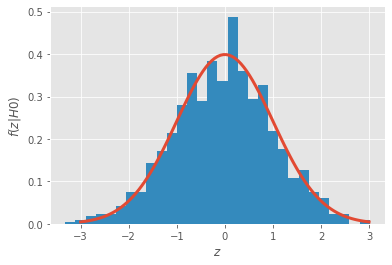

In [ ]:
x = np.linspace(-3, 3, 100)
norm_rv = stats.norm(loc=0, scale=1)
pdf = norm_rv.pdf(x)

# плотность 
plt.plot(x, pdf, lw=3)

plt.hist(np.array(z), bins=30, density=True);

plt.ylabel('$f(z|H0)$')
plt.xlabel('$z$');

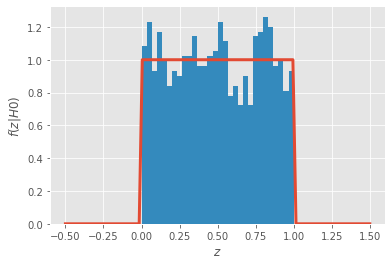

In [ ]:
x = np.linspace(-0.5, 1.5, 100)
uniform_rv = stats.uniform(loc=0, scale=1)
pdf = uniform_rv.pdf(x)

# плотность 
plt.plot(x, pdf, lw=3)

plt.hist(np.array(p), bins=30, density=True);

plt.ylabel('$f(z|H0)$')
plt.xlabel('$z$');